### 1.1 Importing Libraries


In [23]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score,roc_auc_score, roc_curve, auc
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

### 1.2 Loading Data


In [24]:
train=pd.read_csv('Data\churn-bigml-80.csv')
test=pd.read_csv('Data\churn-bigml-20.csv')
data = pd.concat([train, test], ignore_index=True)

### 2 - Data Overview

In [3]:
# display first few rows of the dataset
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# statistical summary of the datase
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
# number of unique states
data['State'].nunique()

51

##### 2.1 check for null values

In [7]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### 2.2 check for duplicates

In [8]:
data.duplicated().sum()

0

### 3 - Exploratory Data Analysis (EDA)

#### 3.1 feature distribution
   Visualize the distribution of features based on churn status

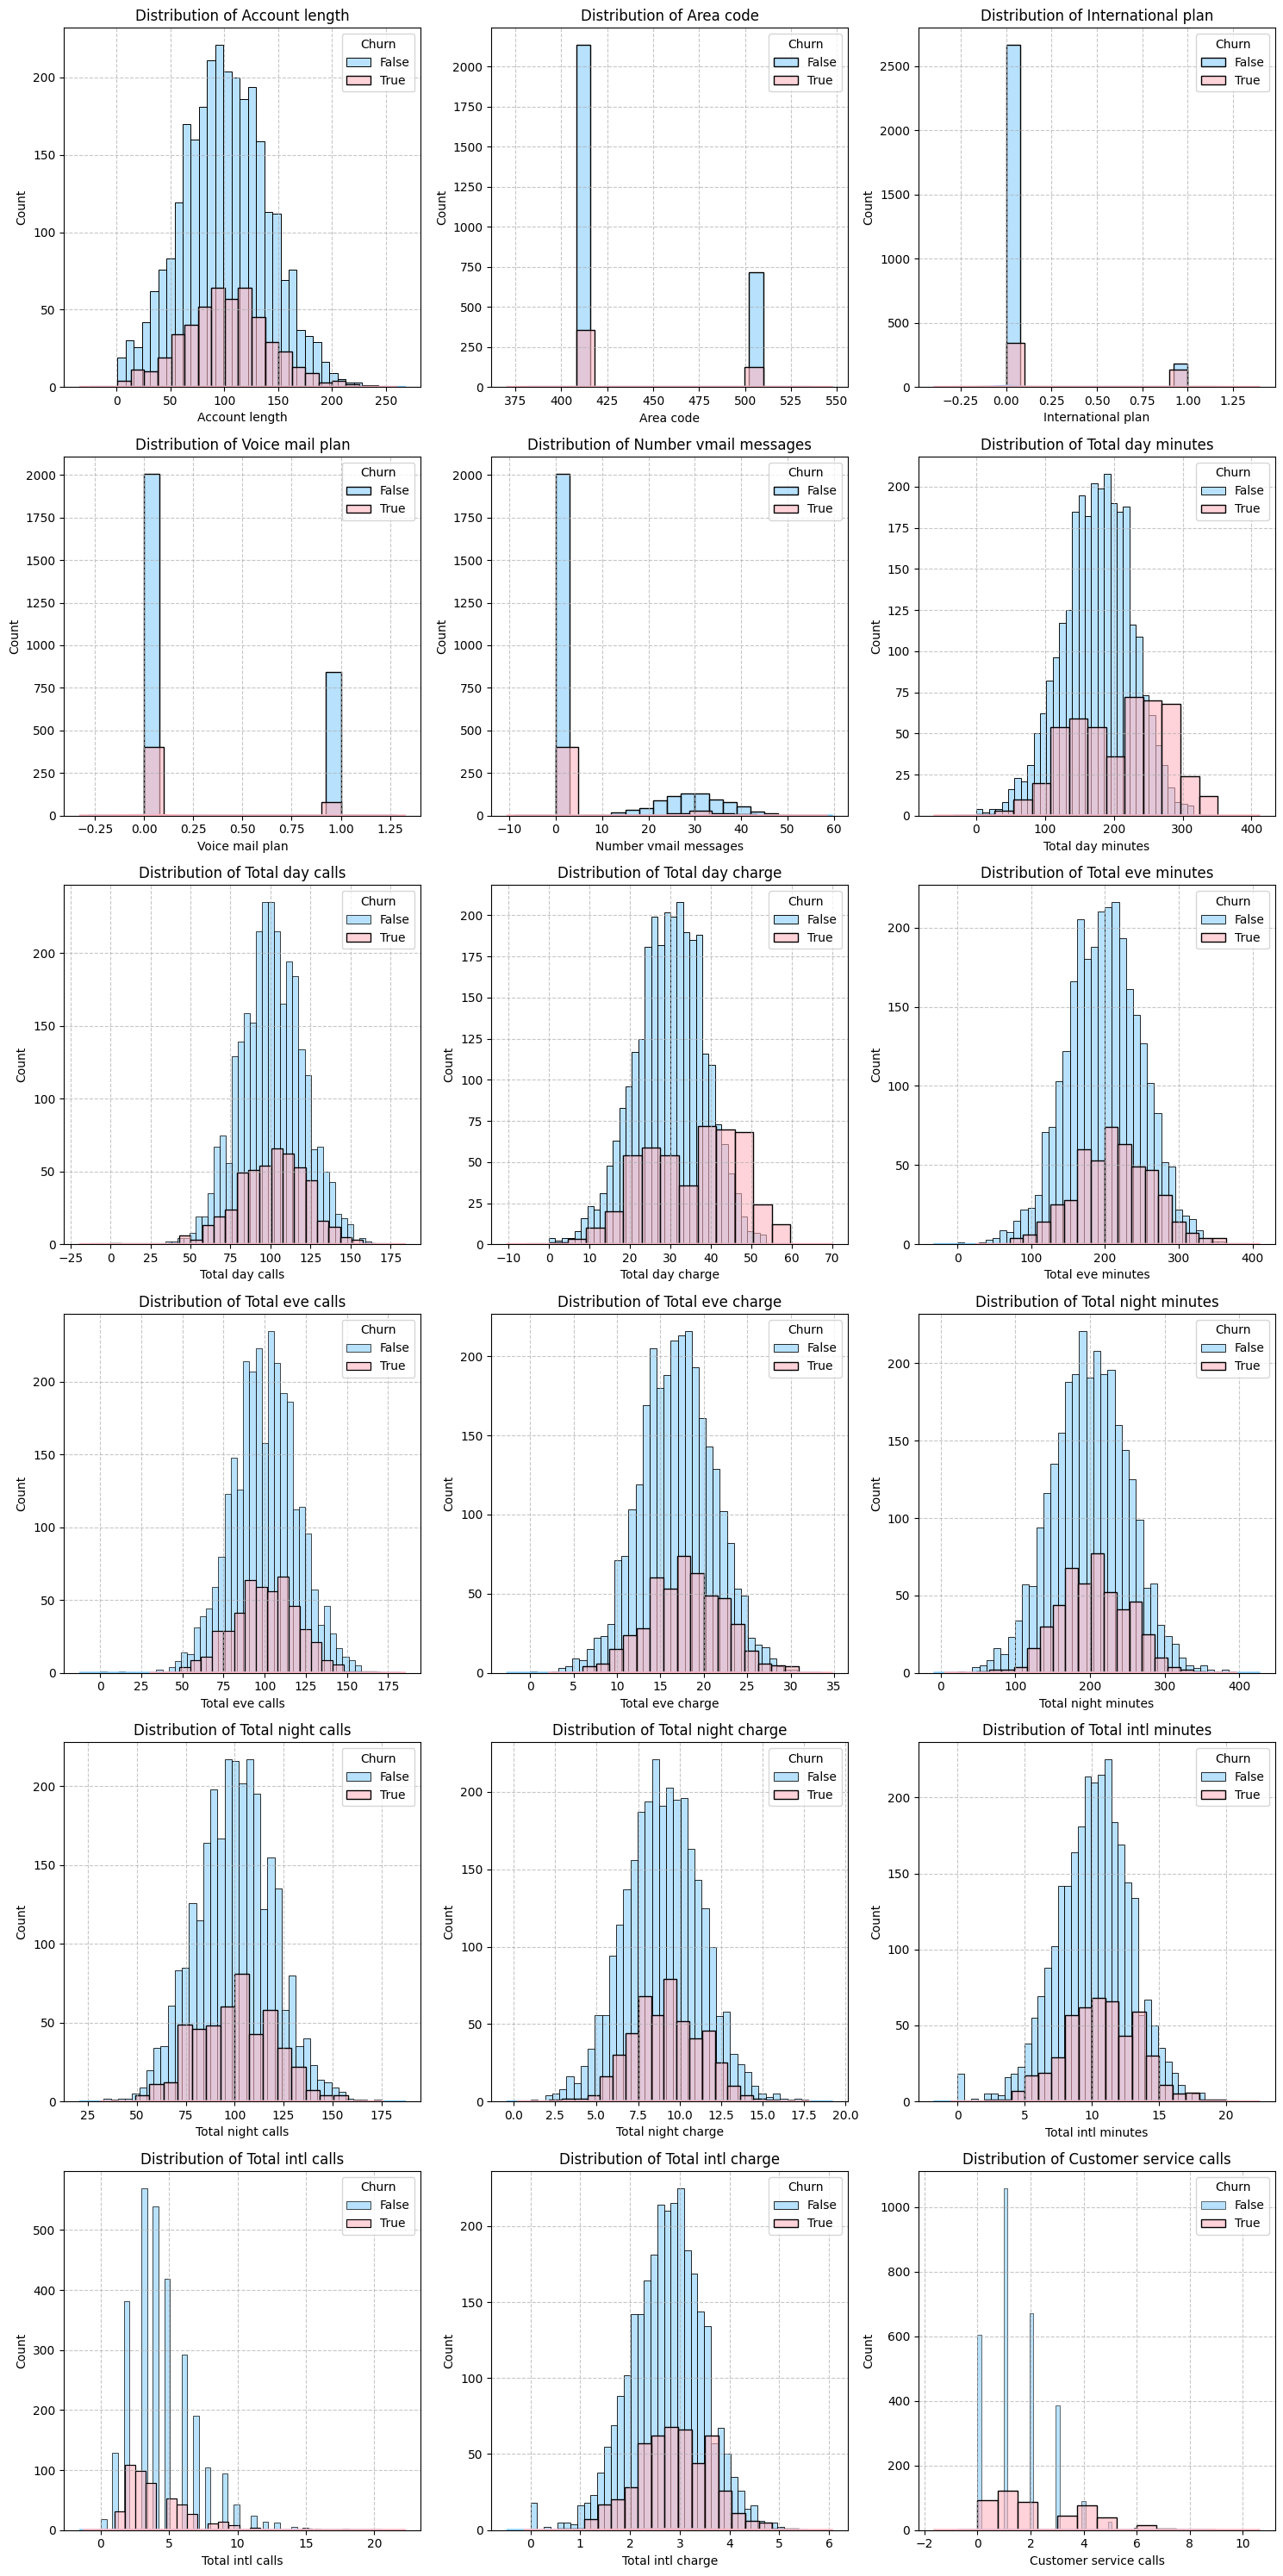

In [25]:
# convert categorical/boolean Features to int
cat_cols = ['International plan', 'Voice mail plan']
data[cat_cols] = data[cat_cols].replace({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype(int)

# get numerical columns (excluding 'Churn')
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'Churn']


## create figure
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel() 

# define colors for each class
colors = ['#87CEFA', '#FFB6C1']

# create histograms for each numerical column
for idx, col in enumerate(numerical_columns):
    # Create histogram with density plot
    sns.histplot(data=data[data['Churn'] == 0], x=col, 
                label='False', color=colors[0], 
                stat='count', alpha=0.6,
                ax=axes[idx])
    
    sns.histplot(data=data[data['Churn'] == 1], x=col, 
                label='True', color=colors[1], 
                stat='count', alpha=0.6,
                ax=axes[idx] )
    
    # Add density curves
    sns.kdeplot(data=data[data['Churn'] == 0], x=col, 
                color=colors[0], linewidth=2,
                ax=axes[idx])
    sns.kdeplot(data=data[data['Churn'] == 1], x=col, 
                color=colors[1], linewidth=2,
                ax=axes[idx])
    
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].legend(title='Churn')
    axes[idx].grid(True, linestyle='--', alpha=0.7)
    

plt.tight_layout()
plt.show()

#### 3.2 check for imbalance 
  assess if there is class imbalance in the target variable 'Churn'

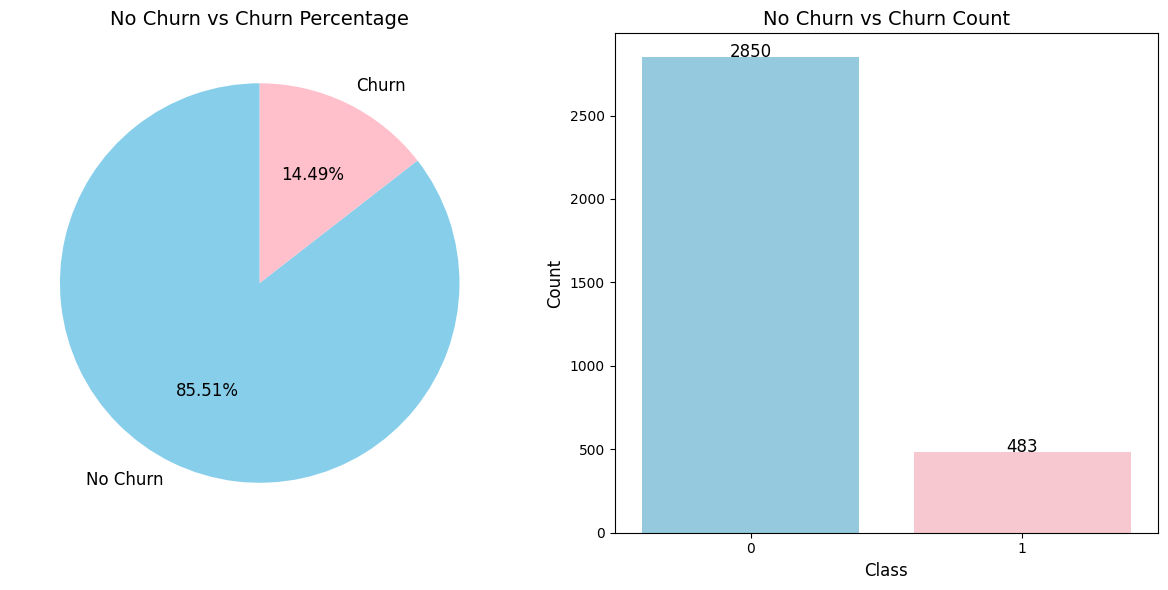

In [10]:
# count occurences of each class in the target column
class_counts = data['Churn'].value_counts()

# calculate the percentage of the occurences
percentages = class_counts / len(data) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# pie chart
axes[0].pie(
    percentages, 
    labels=['No Churn', 'Churn'], 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=['skyblue', 'pink'], 
    textprops={'fontsize': 12}
)
axes[0].set_title('No Churn vs Churn Percentage', fontsize=14)

# bar plot
sns.barplot(
    x=class_counts.index, 
    y=class_counts.values, 
    ax=axes[1], 
    palette=['skyblue', 'pink']
)
for i, count in enumerate(class_counts.values):
    axes[1].text(i, count, f'{count}', ha='center', fontsize=12)
axes[1].set_title('No Churn vs Churn Count', fontsize=14)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


#### 3.3 check correlation between features
  examine the correlations among numerical features
  

<Axes: >

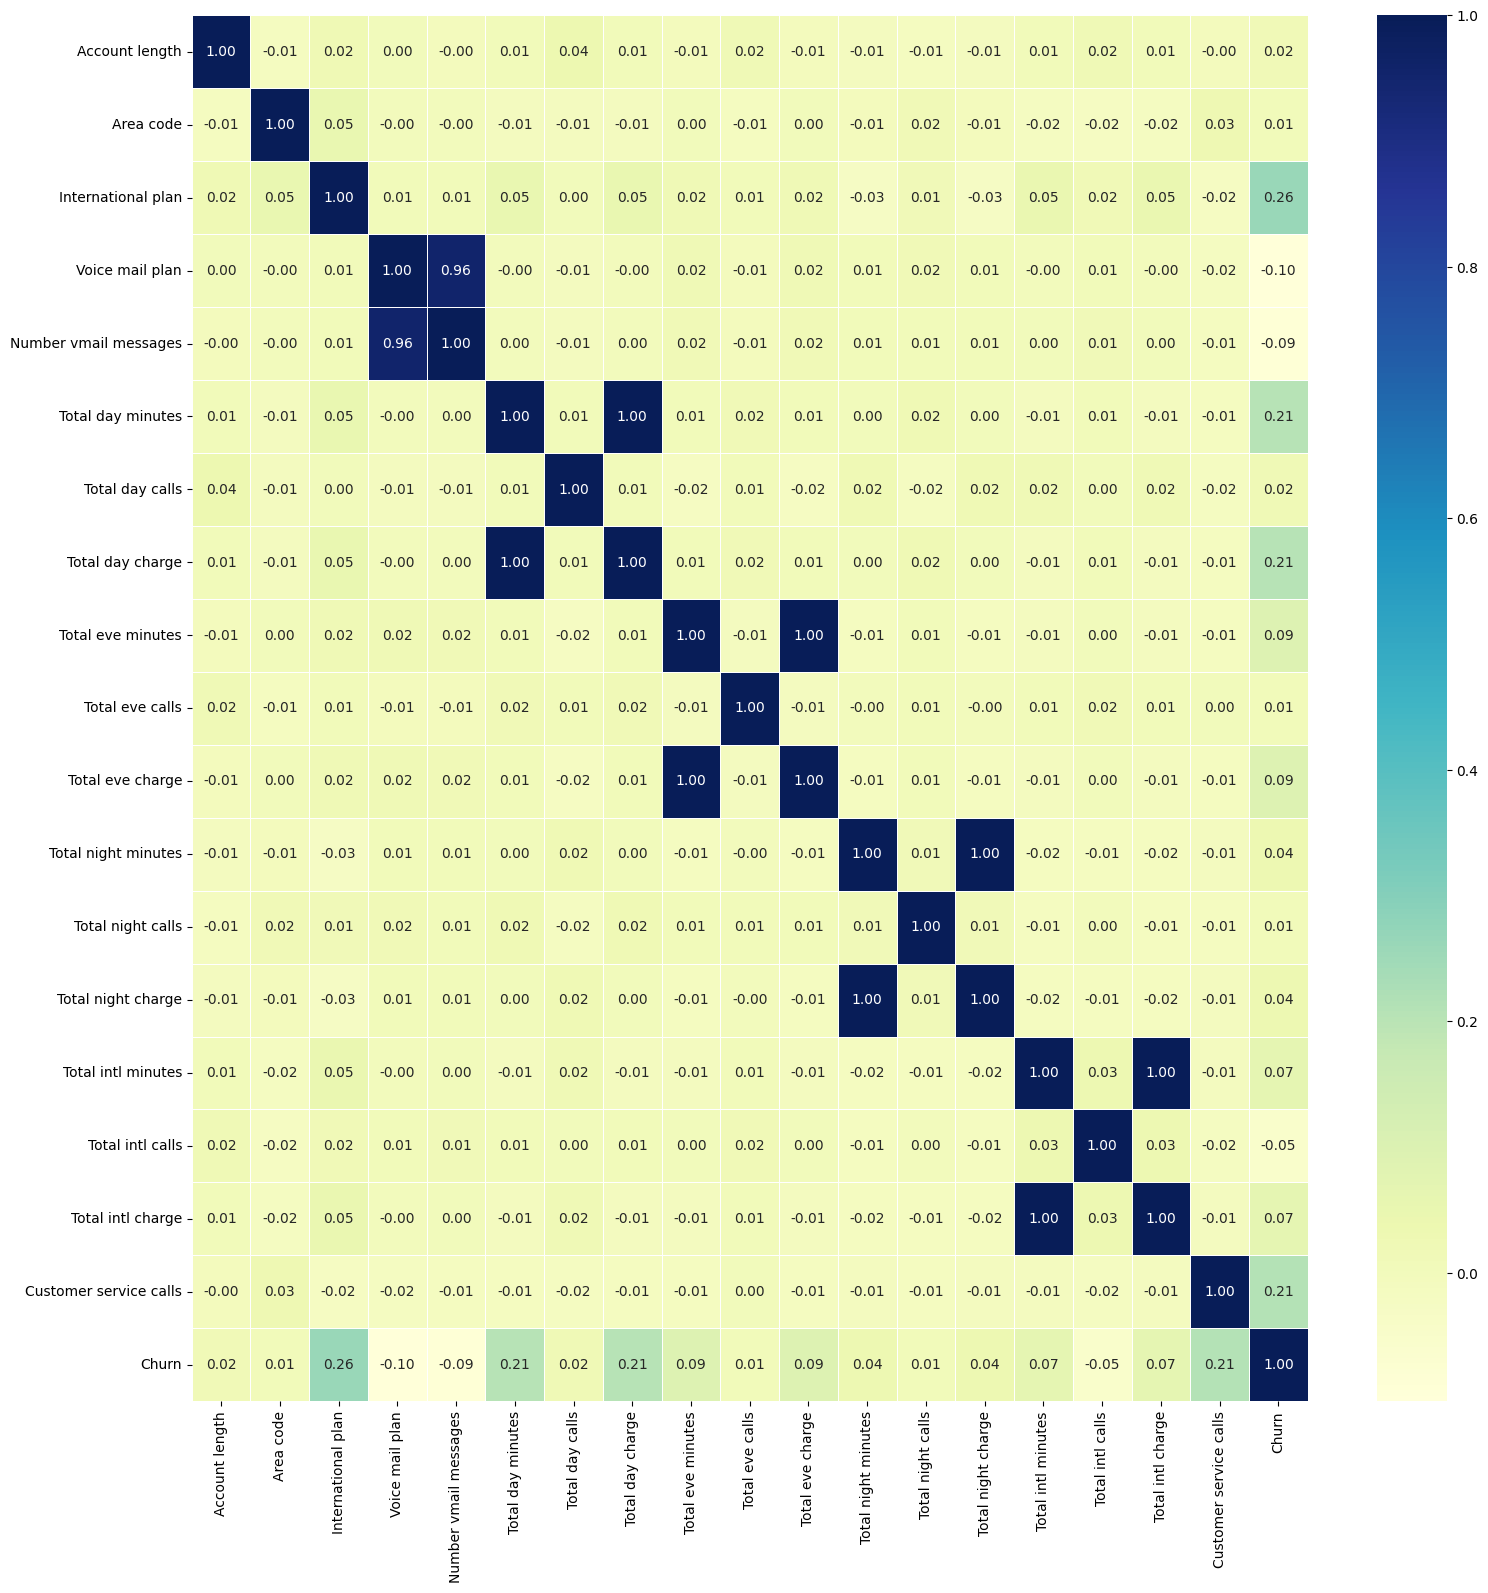

In [11]:
# plot correlations 
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.5)

#### 3.4 Mutual Information (MI) Scores
 Calculate Mutual Information (MI) scores to assess the relevance of each feature with respect to the target variable 'Churn'.


                   Feature  MI Score
5        Total day minutes  0.054738
7         Total day charge  0.054674
17  Customer service calls  0.039978
2       International plan  0.023280
3          Voice mail plan  0.011336
4    Number vmail messages  0.011022
1                Area code  0.010929
0           Account length  0.009904
14      Total intl minutes  0.006956
6          Total day calls  0.006861
11     Total night minutes  0.005224
16       Total intl charge  0.002751
9          Total eve calls  0.001176
13      Total night charge  0.000717
15        Total intl calls  0.000185
8        Total eve minutes  0.000000
10        Total eve charge  0.000000
12       Total night calls  0.000000


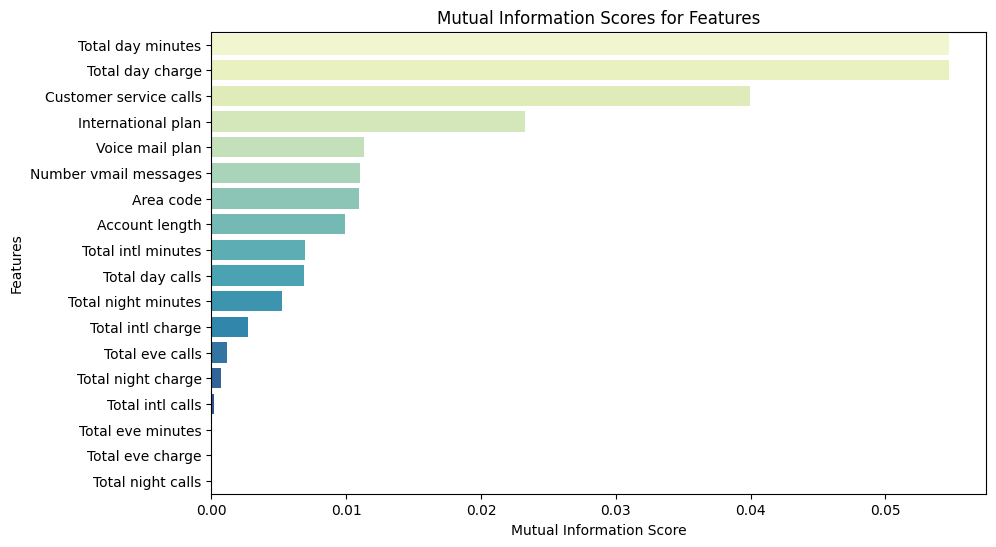

In [12]:
# get numeric columns
numerical_columns = data.select_dtypes(include=['number']).columns

# compute mutual information
mi = mutual_info_classif(data[numerical_columns].drop('Churn', axis=1), data['Churn'], random_state=42)

# create a dataframe to display MI scores
mi_scores = pd.DataFrame({'Feature': numerical_columns.drop('Churn'), 'MI Score': mi})
mi_scores = mi_scores.sort_values(by='MI Score', ascending=False)


print(mi_scores)
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_scores, x='MI Score', y='Feature', palette='YlGnBu')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

#### 3.5 churn distribution of some important features
 analyze how the distribution of important features varies with churn status.


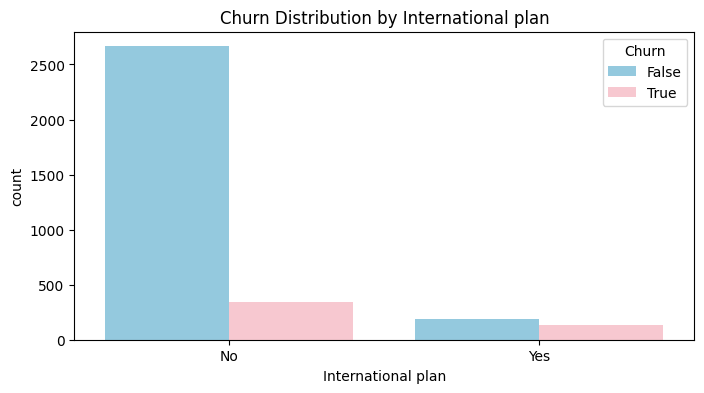

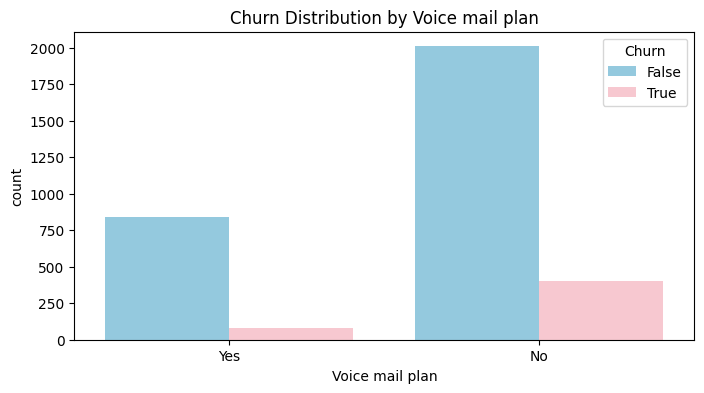

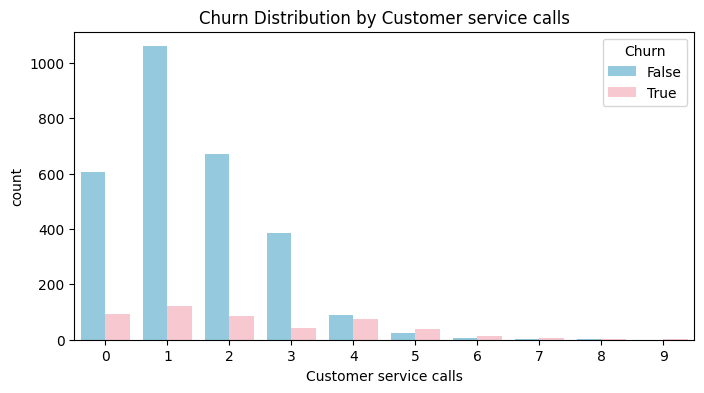

In [15]:
sns.set_palette(['skyblue', 'pink'])

features = ['International plan', 'Voice mail plan','Customer service calls']

for feature in features:
    plt.figure(figsize=(8, 4))  
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f"Churn Distribution by {feature}")
    plt.show()

#### 3.6 mean feature values by churn status
compare the mean values of features for churned and non-churned customers

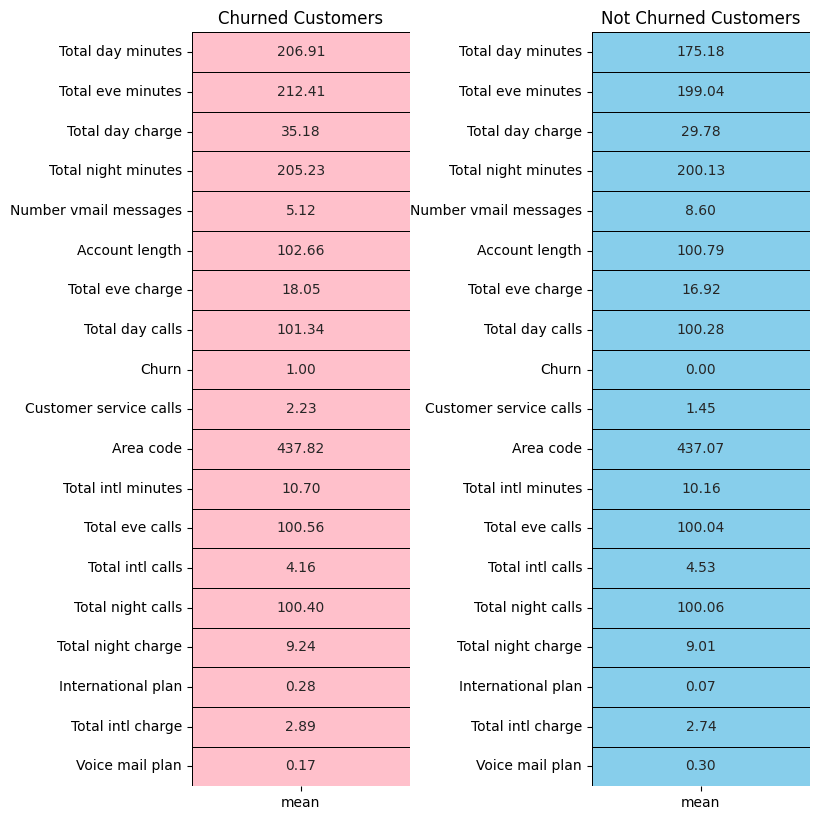

In [14]:
# calculate mean values for churned and not churned customers
Churned = data[data['Churn'] == 1].describe().T
Not_Churned = data[data['Churn'] == 0].describe().T

# Calculate the absolute difference in means between the two groups 
diff_means = abs(Churned['mean'] - Not_Churned['mean'])

# sorth them based on the absolute difference
Churned = Churned.loc[diff_means.sort_values(ascending=False).index]
Not_Churned = Not_Churned.loc[diff_means.sort_values(ascending=False).index]


colors_churned = '#FFC0CB'  
colors_not_churned = '#87CEEB'  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

sns.heatmap(Churned[['mean']], annot=True, cmap=[colors_churned], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Churned Customers')

sns.heatmap(Not_Churned[['mean']], annot=True, cmap=[colors_not_churned], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Not Churned Customers')

fig.tight_layout(pad=0)
plt.show()

#### 3.7 check for outliers
identify outliers in numerical features using box plots and the IQR method

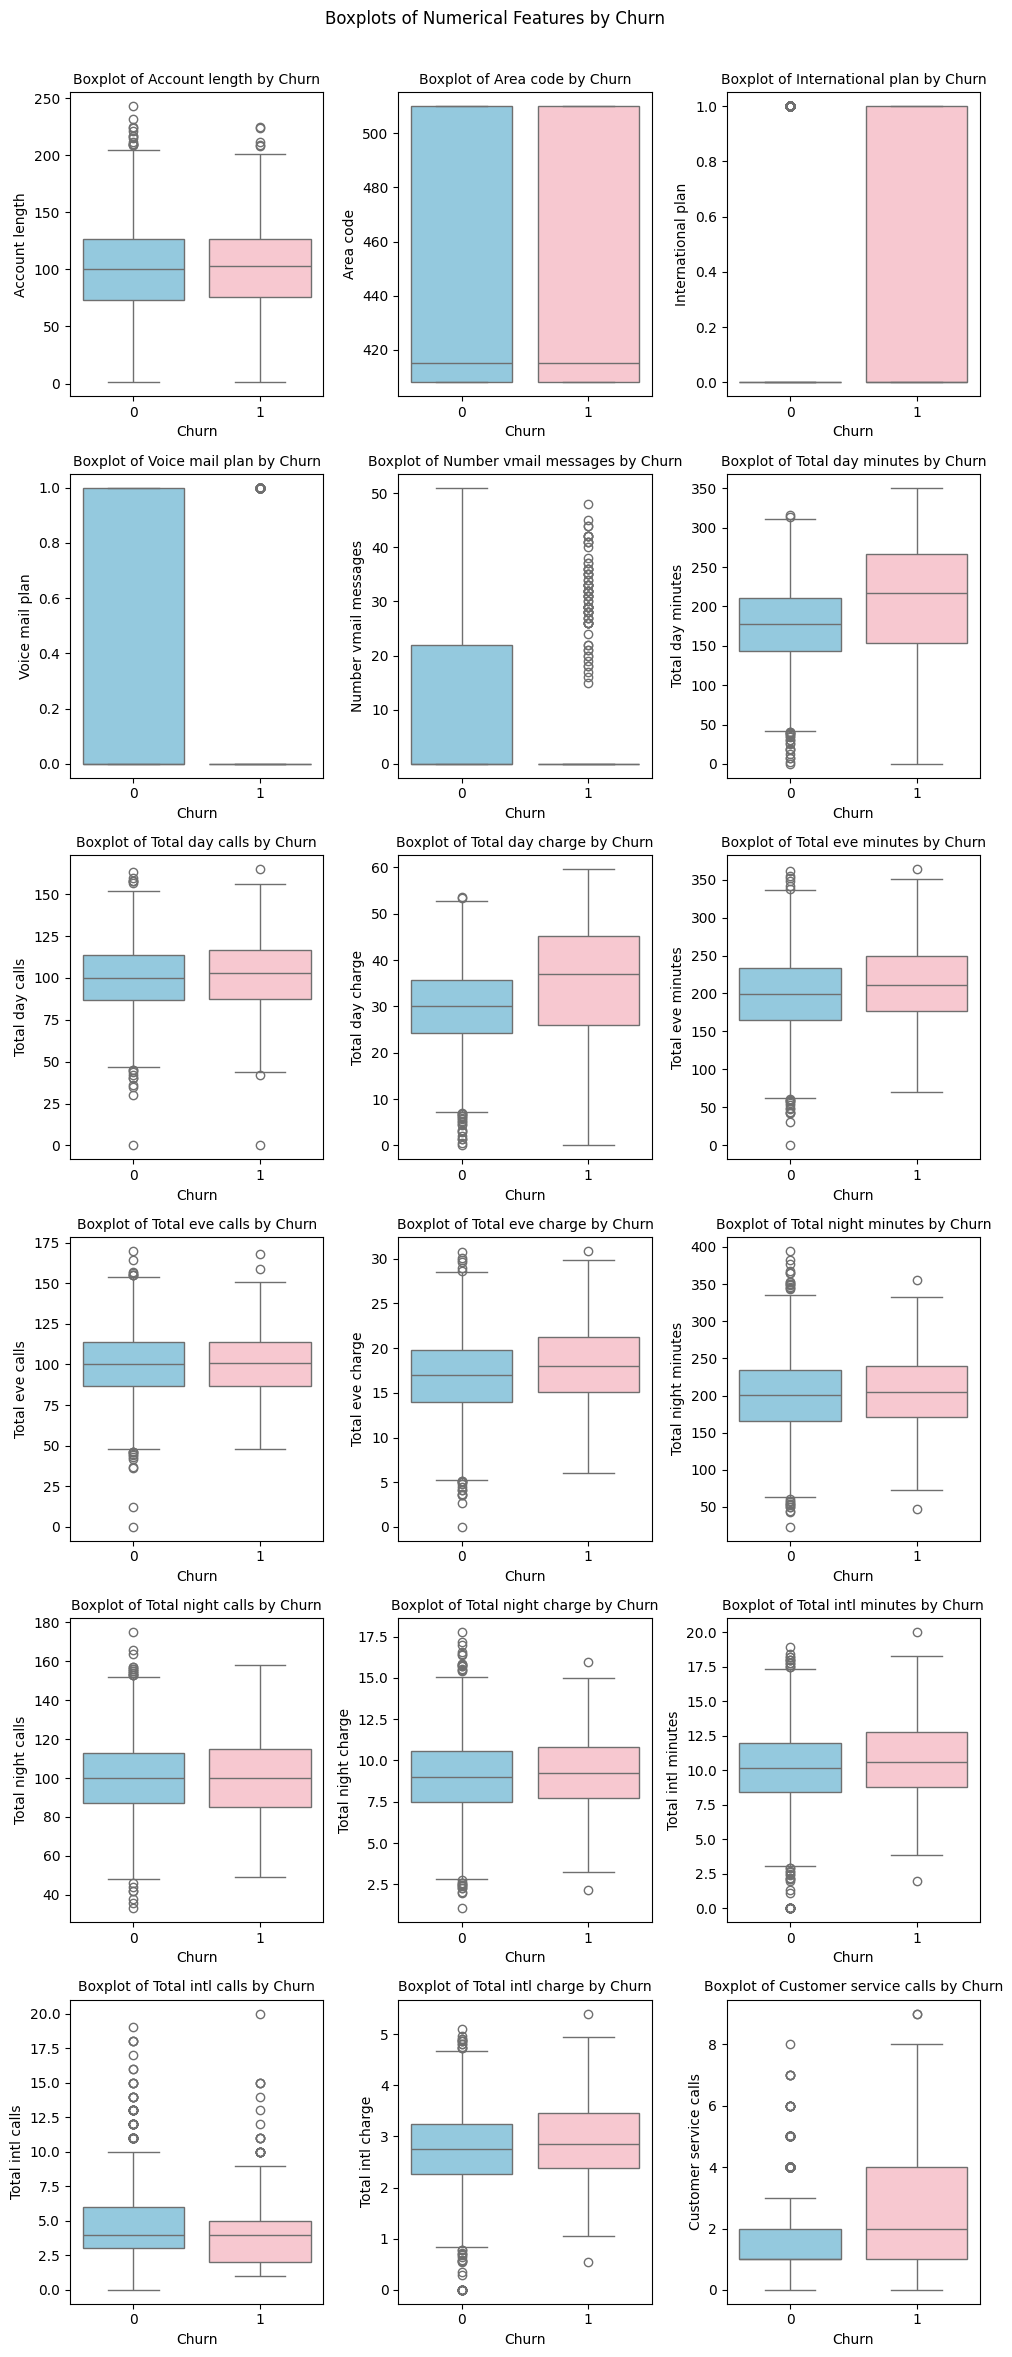

In [15]:
# features to plot
features = numerical_columns.drop('Churn')

# columns and rows needed
num_features = len(features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 4))


axes = axes.flatten()
# iterate through features and create boxplots
for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=data, ax=axes[i], palette=['skyblue', 'pink'])
    axes[i].set_title(f'Boxplot of {feature} by Churn', fontsize=10)
    axes[i].set_xlabel('Churn', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig.suptitle('Boxplots of Numerical Features by Churn', fontsize=12)

plt.show()

In [16]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


exclude_columns = ['Area code', 'International plan', 'Voice mail plan', 'State', 'Churn']

columns_to_analyze = [col for col in data.columns if col not in exclude_columns]

# find outliers in each column
for col in columns_to_analyze:
    outliers = data[find_outliers(data[col])]
    print(f"Outliers in {col}:")
    print(outliers[col].values)
    print("-----------------------------------") 

Outliers in Account length:
[209 224 243 210 212 225 225 224 212 210 217 221 208 215 217 232 209 209]
-----------------------------------
Outliers in Number vmail messages:
[51]
-----------------------------------
Outliers in Total day minutes:
[337.4 350.8 335.5  30.9  34.  346.8  12.5   0.    0.   19.5 329.8   7.9
 328.1  27.   17.6 326.3 345.3   2.6   7.8  18.9  29.9 332.9 326.5 334.3
  25.9]
-----------------------------------
Outliers in Total day calls:
[158  36  40 158  42   0  45   0  45 160 156  42 158 157  45  44  44  44
 163 165  30  35  40]
-----------------------------------
Outliers in Total day charge:
[57.36 59.64 57.04  5.25  5.78 58.96  2.13  0.    0.    3.32 56.07  1.34
 55.78  4.59  2.99 55.47 58.7   0.44  1.33  3.21  5.08 56.59 55.51 56.83
  4.4 ]
-----------------------------------
Outliers in Total eve minutes:
[ 61.9 348.5  31.2  42.2 347.3  58.9  43.9  52.9  42.5  58.6  56.  350.9
  49.2 339.9 354.2 363.7   0.  341.3 351.6 350.5  60.8  48.1  60.  361.8]
-------

#### 3.8 checking importance of categorical feature 
Chi-square test to assess the importance of the categorical feature 'State' in predicting churn

In [17]:
# Chi-square test of independence
contingency_table = pd.crosstab(data['State'], data['Churn'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("'State' might be an important predictor of churn.")
else:
    print("'State' might not be a strong predictor of churn.")


Chi-square test p-value: 0.0023
'State' might be an important predictor of churn.


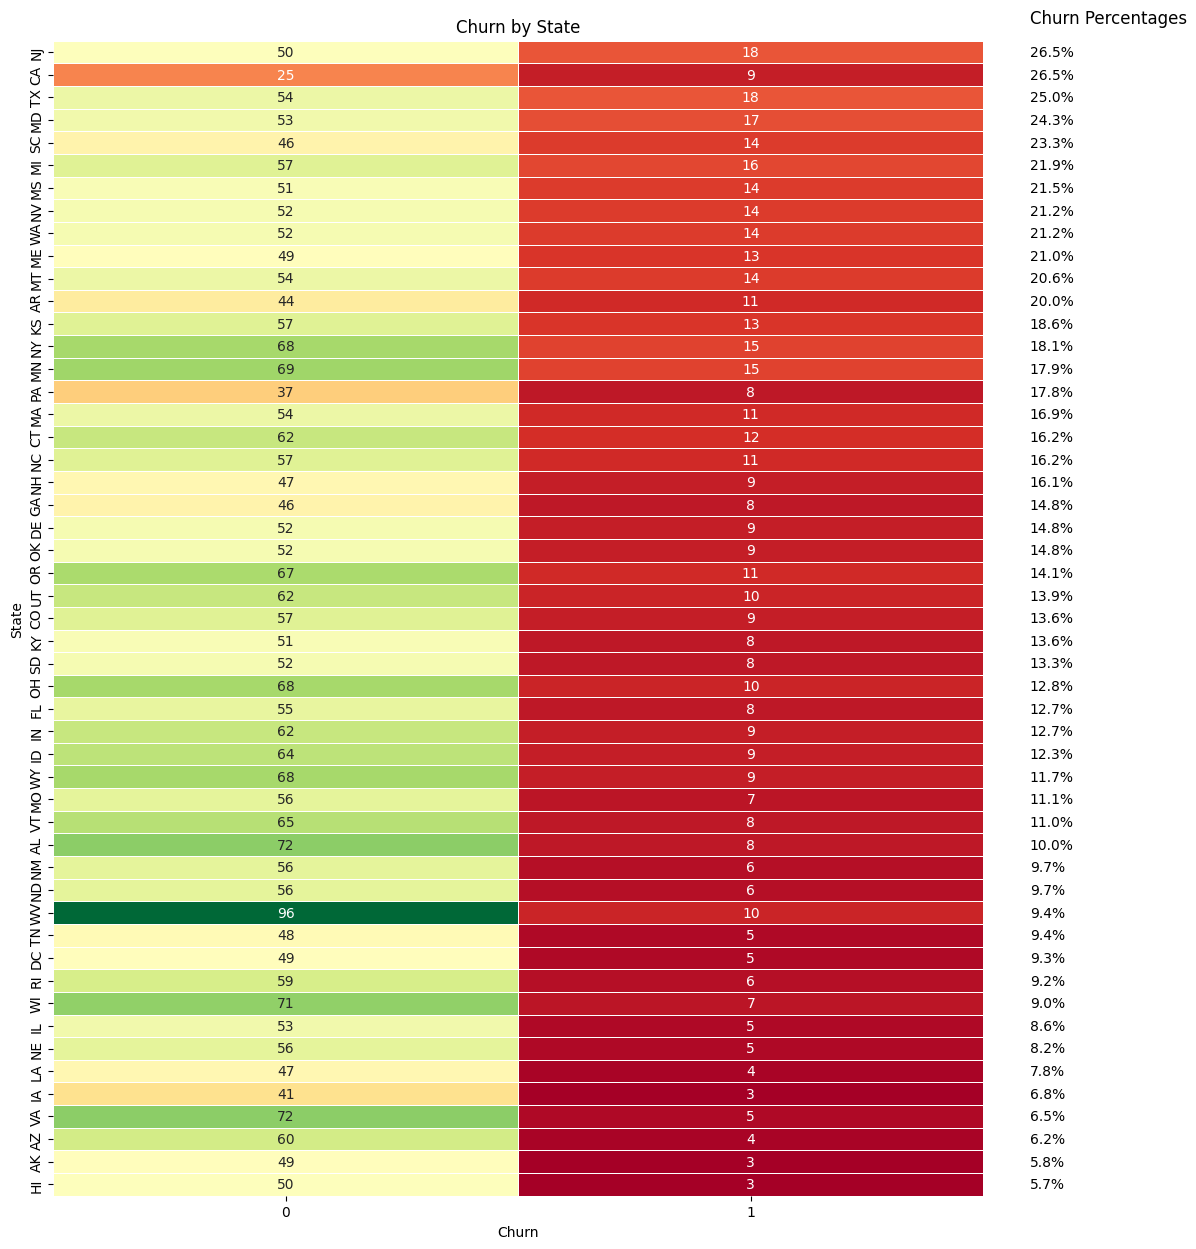

In [18]:
# create a contingency table to summarize count of churned/not churned in each state
contingency_table = pd.crosstab(data['State'], data['Churn'])

# calculate churn rates for each state
churn_rates = contingency_table[1] / contingency_table.sum(axis=1)

# sort states by churn rate in descending order
sorted_indices = churn_rates.sort_values(ascending=False).index
contingency_table = contingency_table.loc[sorted_indices]
churn_rates = churn_rates.loc[sorted_indices]


plt.figure(figsize=(12, 15))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap='RdYlGn', linewidths=.5, cbar=False)
plt.title("Churn by State")
plt.xlabel("Churn")
plt.ylabel("State")

for i in range(len(churn_rates)):
    plt.text(2.1, i + 0.5, f"{churn_rates[i]*100:.1f}%", va='center', ha='left', color='black', fontsize=10)

plt.text(2.1, -1, 'Churn Percentages', va='center', ha='left', color='black', fontsize=12)


plt.show()

### EDA conclusions

- dataset is complete with no missing values or duplicate records
- The dataset shows approximately normal distribution in most variables
- features have very different scales
- class distribution shows imbalance (majority non-churned customers)
- there is multicollinearity detected between related features (minutes and charges)
- higher service utilization and charges correlate with increased churn probability
- geographic location (State) shows significant influence on churn status
- outliers are detected but will be kept as they represent valid customer behavior 




### 4 - Data Preprocessing 

#### 4.1 handling multicollinearity

In [26]:
# drop multicollinear features
columns = ['Total intl minutes', 'Total day minutes', 'Total night minutes', 'Total eve minutes']
data.drop(columns, axis = 1, inplace = True)

<Axes: >

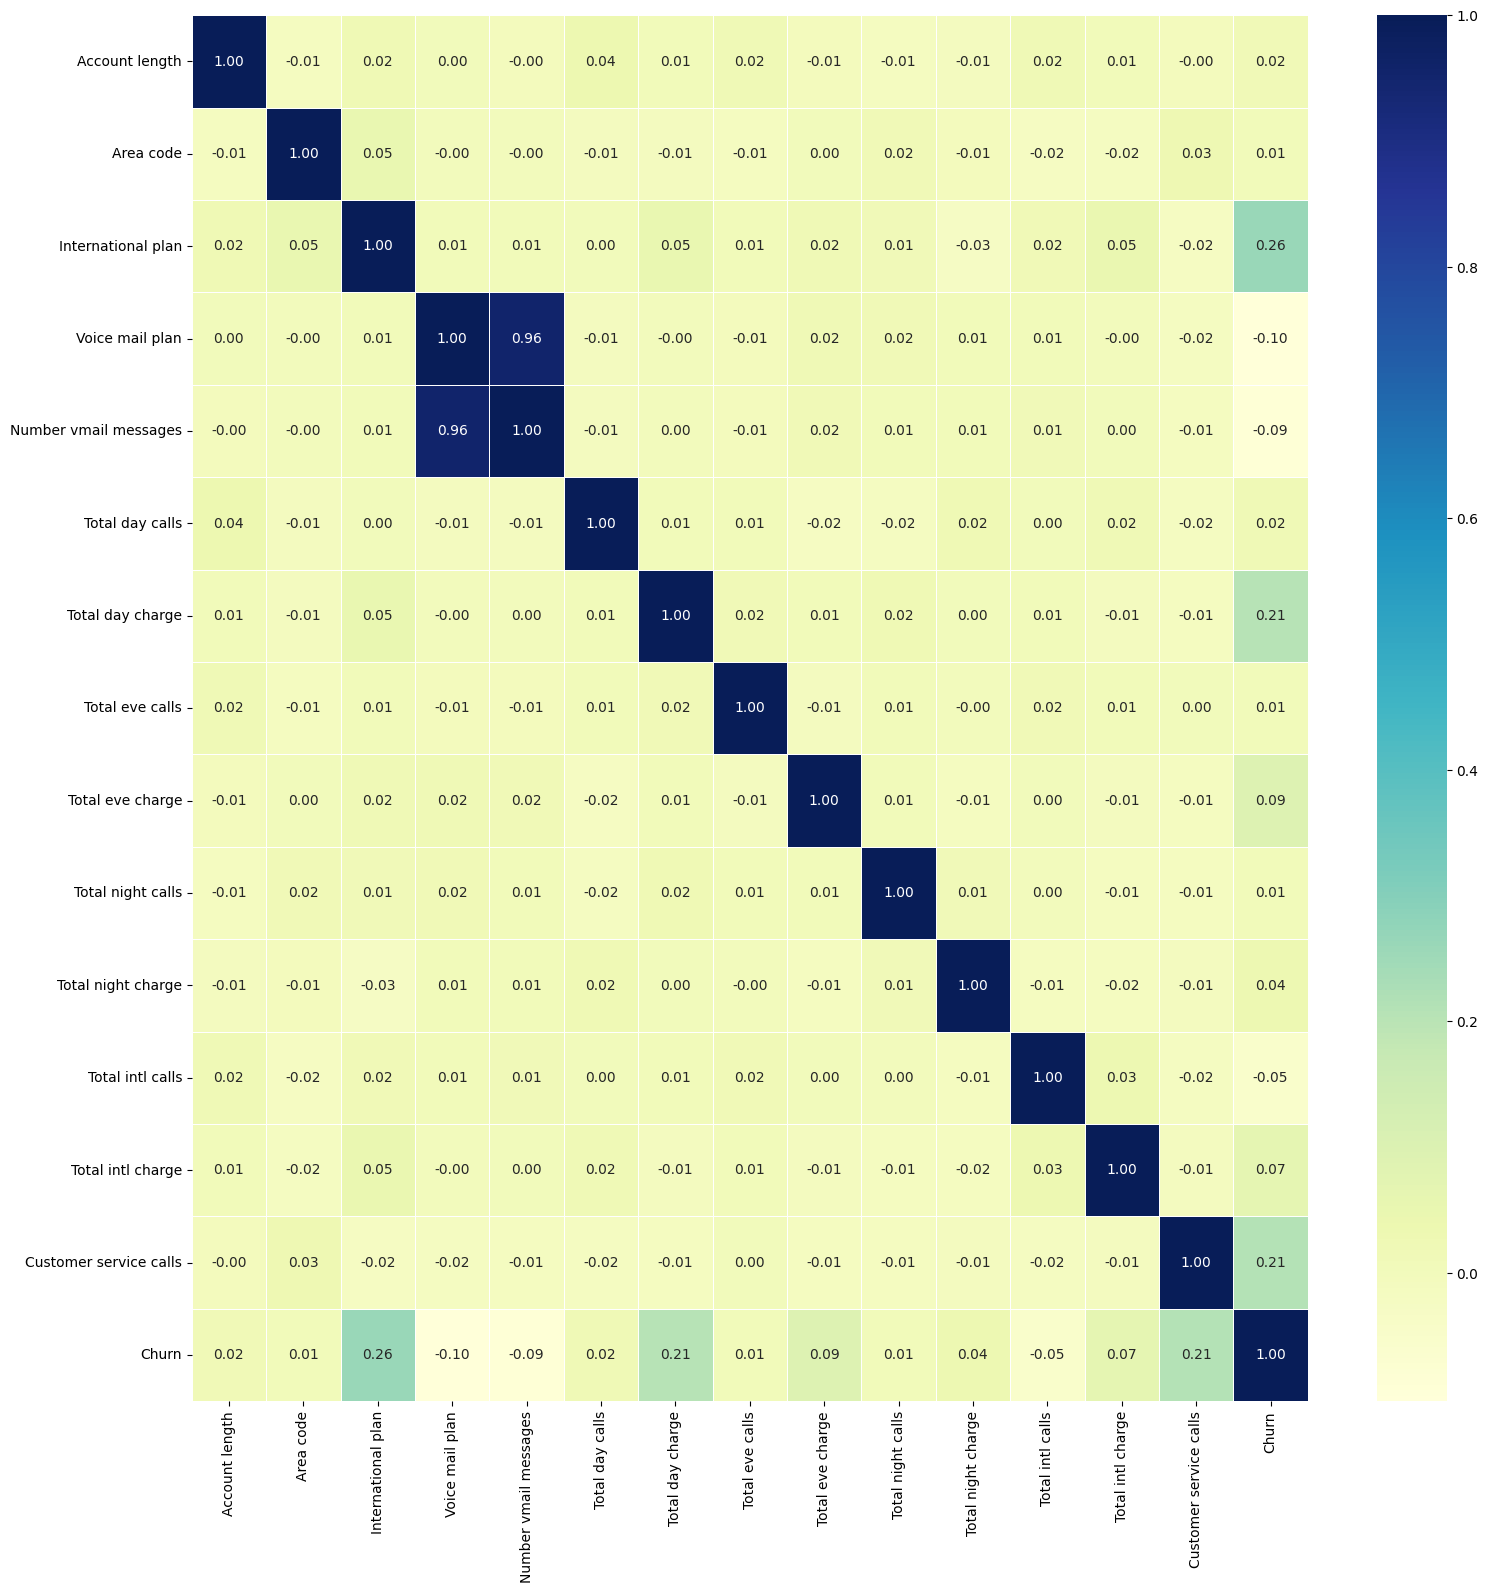

In [20]:
# plot correlations 
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.5)

#### 4.2 One Hot encode categorical column Area code
one hot encoding selected because of no ordinal relationships existing

In [28]:
data = pd.get_dummies(data, columns=['Area code'], prefix=['Area_code'])


#### 4.3 split data

In [29]:
X = data.drop('Churn', axis=1)
y = data['Churn']

# splitting the data into training and test sets, stratifying by the target variable 'Churn'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### 4.4 target encode categorical column State
target encoding selected for 'State' column because of its high cardinality

In [30]:
# compute mean churn rate per state in the training set
state_mean_churn = X_train.join(y_train).groupby('State')['Churn'].mean()

# apply encoding to training data
X_train['state_encoded'] = X_train['State'].map(state_mean_churn)

# apply encoding to test data 
X_test['state_encoded'] = X_test['State'].map(state_mean_churn)

# drop original `State` column as it is now encoded
X_train.drop('State', axis=1, inplace=True)
X_test.drop('State', axis=1, inplace=True)

#### 4.5 handle class imbalance
apply SMOTE oversampling

In [31]:
# apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [32]:
y_train_balanced.value_counts()

Churn
0    2280
1    2280
Name: count, dtype: int64

#### 4.6 feature scaling
StandardScaler selected due to features normal distributions

##### scale balanced data

In [33]:
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test_balanced = scaler.transform(X_test)

In [34]:
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)
X_test_balanced = pd.DataFrame(X_test_balanced, columns=X_test.columns)

##### scale unbalanced data

In [35]:
x_train= scaler.fit_transform(X_train)
x_test= scaler.transform(X_test)

In [36]:
x_train = pd.DataFrame(x_train, columns=X_train.columns)
x_test = pd.DataFrame(x_test, columns=X_test.columns)

x_train.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Area_code_408,Area_code_415,Area_code_510,state_encoded
0,-1.864555,-0.327327,-0.616954,-0.591217,-1.676747,0.873117,0.743245,0.918338,0.443262,-2.757121,0.628584,-0.878605,-0.426912,-0.583414,1.001502,-0.572441,-0.539267
1,-1.637832,3.055050,1.620867,2.476994,-0.571218,0.309758,1.097219,1.055589,1.310946,-1.234625,0.628584,3.474391,-1.200637,-0.583414,-0.998501,1.746903,0.749560
2,1.838589,-0.327327,1.620867,0.504573,2.142354,0.770195,0.743245,0.178577,0.443262,0.419880,1.859586,0.762038,-0.426912,-0.583414,1.001502,-0.572441,0.541073
3,-0.907280,-0.327327,1.620867,1.088994,0.283055,0.813531,-0.015269,-0.235504,-1.292108,0.441881,-0.192084,-0.164132,-1.200637,-0.583414,1.001502,-0.572441,0.541073
4,1.359951,-0.327327,-0.616954,-0.591217,-0.370212,-0.313187,0.085866,0.045978,0.443262,-0.825399,-0.192084,1.727900,0.346812,1.714048,-0.998501,-0.572441,0.797548


### 5 - Model Building & Evaluation

In [37]:
def tune_and_evaluate_models(X_train, y_train, X_test, y_test, models, param_grids, cv, dataset_name):
    """
    Tune models using GridSearchCV and evaluate on test data
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - models: Dictionary of models to tune
    - param_grids: Dictionary of parameter grids for each model
    - cv: Cross-validation strategy
    - dataset_name: String to identify the dataset (e.g., 'Unbalanced', 'Balanced')
    
    Returns:
    - Dictionary of results for each model
    """
    # Dictionary to store results
    results = {}
    
    # Metrics to calculate
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc_score
    }
    
    # Tune and evaluate each model
    for name, model in models.items():
        print(f"\n--- Tuning {name} on {dataset_name} Dataset ---")
        
        # Perform Grid Search
        grid = GridSearchCV(
            model, 
            param_grids[name], 
            cv=cv, 
            scoring='roc_auc', 
            n_jobs=-1, 
            verbose=1
        )
        grid.fit(X_train, y_train)
        
        # Get best model
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        
        # Predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        model_metrics = {}
        for metric_name, metric_func in metrics.items():
            if metric_name in ['Precision', 'Recall', 'F1 Score']:
                model_metrics[metric_name] = metric_func(y_test, y_pred, average='weighted')
            elif metric_name == 'ROC AUC':
                try:
                    model_metrics[metric_name] = metric_func(y_test, y_pred_proba)
                except ValueError:
                    model_metrics[metric_name] = "Not applicable"
            else:
                model_metrics[metric_name] = metric_func(y_test, y_pred)
        
        # Store results
        results[name] = {
            'Best Model': best_model,
            'Best Params': best_params,
            'Metrics': model_metrics,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred),
            'y_pred_proba': y_pred_proba 
        }
    
    return results

#### model setup and parameter grids

In [38]:
# Cross-Validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grids 
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2'],
    },
    'DecisionTree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
    },
}

# models to evaluate
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',  
        n_jobs=-1
    )

}


# calculate the scale_pos_weight based on the class imbalance in training set
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1] 

# models with weighted loss for imbalance handling
models_weighted_loss = {
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',  
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    )  
}    

##### evaluating models

In [39]:
# Evaluate models on the unbalanced dataset
unbalanced_results = tune_and_evaluate_models(
    x_train, y_train, x_test, y_test, 
    models, param_grids, cv, 
    dataset_name='Unbalanced'
)

# Evaluate models on the balanced dataset (SMOTE)
balanced_results_smote = tune_and_evaluate_models(
    X_train_balanced, y_train_balanced, 
    X_test_balanced, y_test, 
    models, param_grids, cv, 
    dataset_name='Balanced SMOTE'
)

# Evaluate models on the unbalanced dataset (Weighted Loss)
balanced_results_weighted_loss = tune_and_evaluate_models(
    x_train, y_train, x_test, y_test, 
    models_weighted_loss, param_grids, cv, 
    dataset_name='Unbalanced (Class-Weighted Models)'
)




--- Tuning LogisticRegression on Unbalanced Dataset ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Tuning DecisionTree on Unbalanced Dataset ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Tuning RandomForest on Unbalanced Dataset ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits

--- Tuning XGBoost on Unbalanced Dataset ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Tuning LogisticRegression on Balanced SMOTE Dataset ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Tuning DecisionTree on Balanced SMOTE Dataset ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Tuning RandomForest on Balanced SMOTE Dataset ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits

--- Tuning XGBoost on Balanced SMOTE Dataset ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Tuning LogisticRegression on Unbalanced (Class-Weighted Models) Dataset ---

In [40]:
# Printing results
def print_results(results):
    for model_name, model_results in results.items():
        print(f"\n{model_name} Results:")
        print("Best Parameters:", model_results['Best Params'])
        print("\nMetrics:")
        for metric, value in model_results['Metrics'].items():
            print(f"{metric}: {value}")
        print("\nClassification Report:")
        print(model_results['Classification Report'])

print("\n--- Unbalanced Dataset Results ---")
print_results(unbalanced_results)

print("\n--- Balanced Dataset (SMOTE) Results ---")
print_results(balanced_results_smote)

print("\n--- Unbalanced Dataset (Class-Weighted Models) Results ---")
print_results(balanced_results_weighted_loss)


--- Unbalanced Dataset Results ---

LogisticRegression Results:
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Metrics:
Accuracy: 0.8665667166416792
Precision: 0.8420351048965313
Recall: 0.8665667166416792
F1 Score: 0.8350731574697616
ROC AUC: 0.8232591788750226

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       570
           1       0.63      0.20      0.30        97

    accuracy                           0.87       667
   macro avg       0.76      0.59      0.61       667
weighted avg       0.84      0.87      0.84       667


DecisionTree Results:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Metrics:
Accuracy: 0.9460269865067467
Precision: 0.9445642719180951
Recall: 0.9460269865067467
F1 Score: 0.9430861561574013
ROC AUC: 0.9135829263881353

Classification Report:
              precision    recall  f1-score   support

           0       0.95  

#### results sorted by highest F1-Score

In [41]:
def create_results_dataframe(results):
    """
    Create a DataFrame from the results dictionary.
    """
    data = []
    for model, result in results.items():
        metrics = result['Metrics']
        data.append([
            model,
            metrics['Accuracy'],
            metrics['Precision'],
            metrics['Recall'],
            metrics['F1 Score'],
            metrics['ROC AUC']
        ])
    
    df = pd.DataFrame(data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    return df

# Create DataFrames for each dataset
unbalanced_df = create_results_dataframe(unbalanced_results)
balanced_smote_df = create_results_dataframe(balanced_results_smote)
balanced_weighted_loss_df = create_results_dataframe(balanced_results_weighted_loss)

# Sort DataFrames by F1 Score
unbalanced_df = unbalanced_df.sort_values(by='F1 Score', ascending=False)
balanced_smote_df = balanced_smote_df.sort_values(by='F1 Score', ascending=False)
balanced_weighted_loss_df = balanced_weighted_loss_df.sort_values(by='F1 Score', ascending=False)

# Display DataFrames 
print("Unbalanced Dataset Results:")
display(unbalanced_df)
print('-------------------------------------------------')
print("Unbalanced Dataset (Class-Weighted Models) Results:")
display(balanced_weighted_loss_df)
print('-------------------------------------------------')
print("Balanced Dataset (SMOTE) Results:")
display(balanced_smote_df)

Unbalanced Dataset Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,XGBoost,0.949025,0.947384,0.949025,0.947087,0.934527
1,DecisionTree,0.946027,0.944564,0.946027,0.943086,0.913583
2,RandomForest,0.934033,0.934978,0.934033,0.927063,0.939085
0,LogisticRegression,0.866567,0.842035,0.866567,0.835073,0.823259


-------------------------------------------------
Unbalanced Dataset (Class-Weighted Models) Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,XGBoost,0.956522,0.955364,0.956522,0.955423,0.931362
2,RandomForest,0.943028,0.940876,0.943028,0.940862,0.944583
1,DecisionTree,0.910045,0.921348,0.910045,0.914029,0.894574
0,LogisticRegression,0.785607,0.866687,0.785607,0.811100,0.831868


-------------------------------------------------
Balanced Dataset (SMOTE) Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,XGBoost,0.937031,0.934863,0.937031,0.932861,0.925737
2,RandomForest,0.916042,0.911989,0.916042,0.913286,0.923214
1,DecisionTree,0.868066,0.883909,0.868066,0.874322,0.824941
0,LogisticRegression,0.812594,0.833751,0.812594,0.821768,0.810020


### Conclusions:
- XGBoost consistently delivered the best results across all datasets, particularly with class weight adjustments.
- Class weighting remarkably improves performance on the unbalanced dataset for XGBoost and Random Forest.
- DecisionTree performed best on unbalanced dataset with no weight adjustments, followings closely behind XGBoost with slightly lower metrics.
- Logistic Regression consistently underperforms compared to tree-based models, even after balancing and class weighting.
- Class weighting proved more efficient that SMOTE for this dataset.

#### Visualizations for Class-Weighted Models

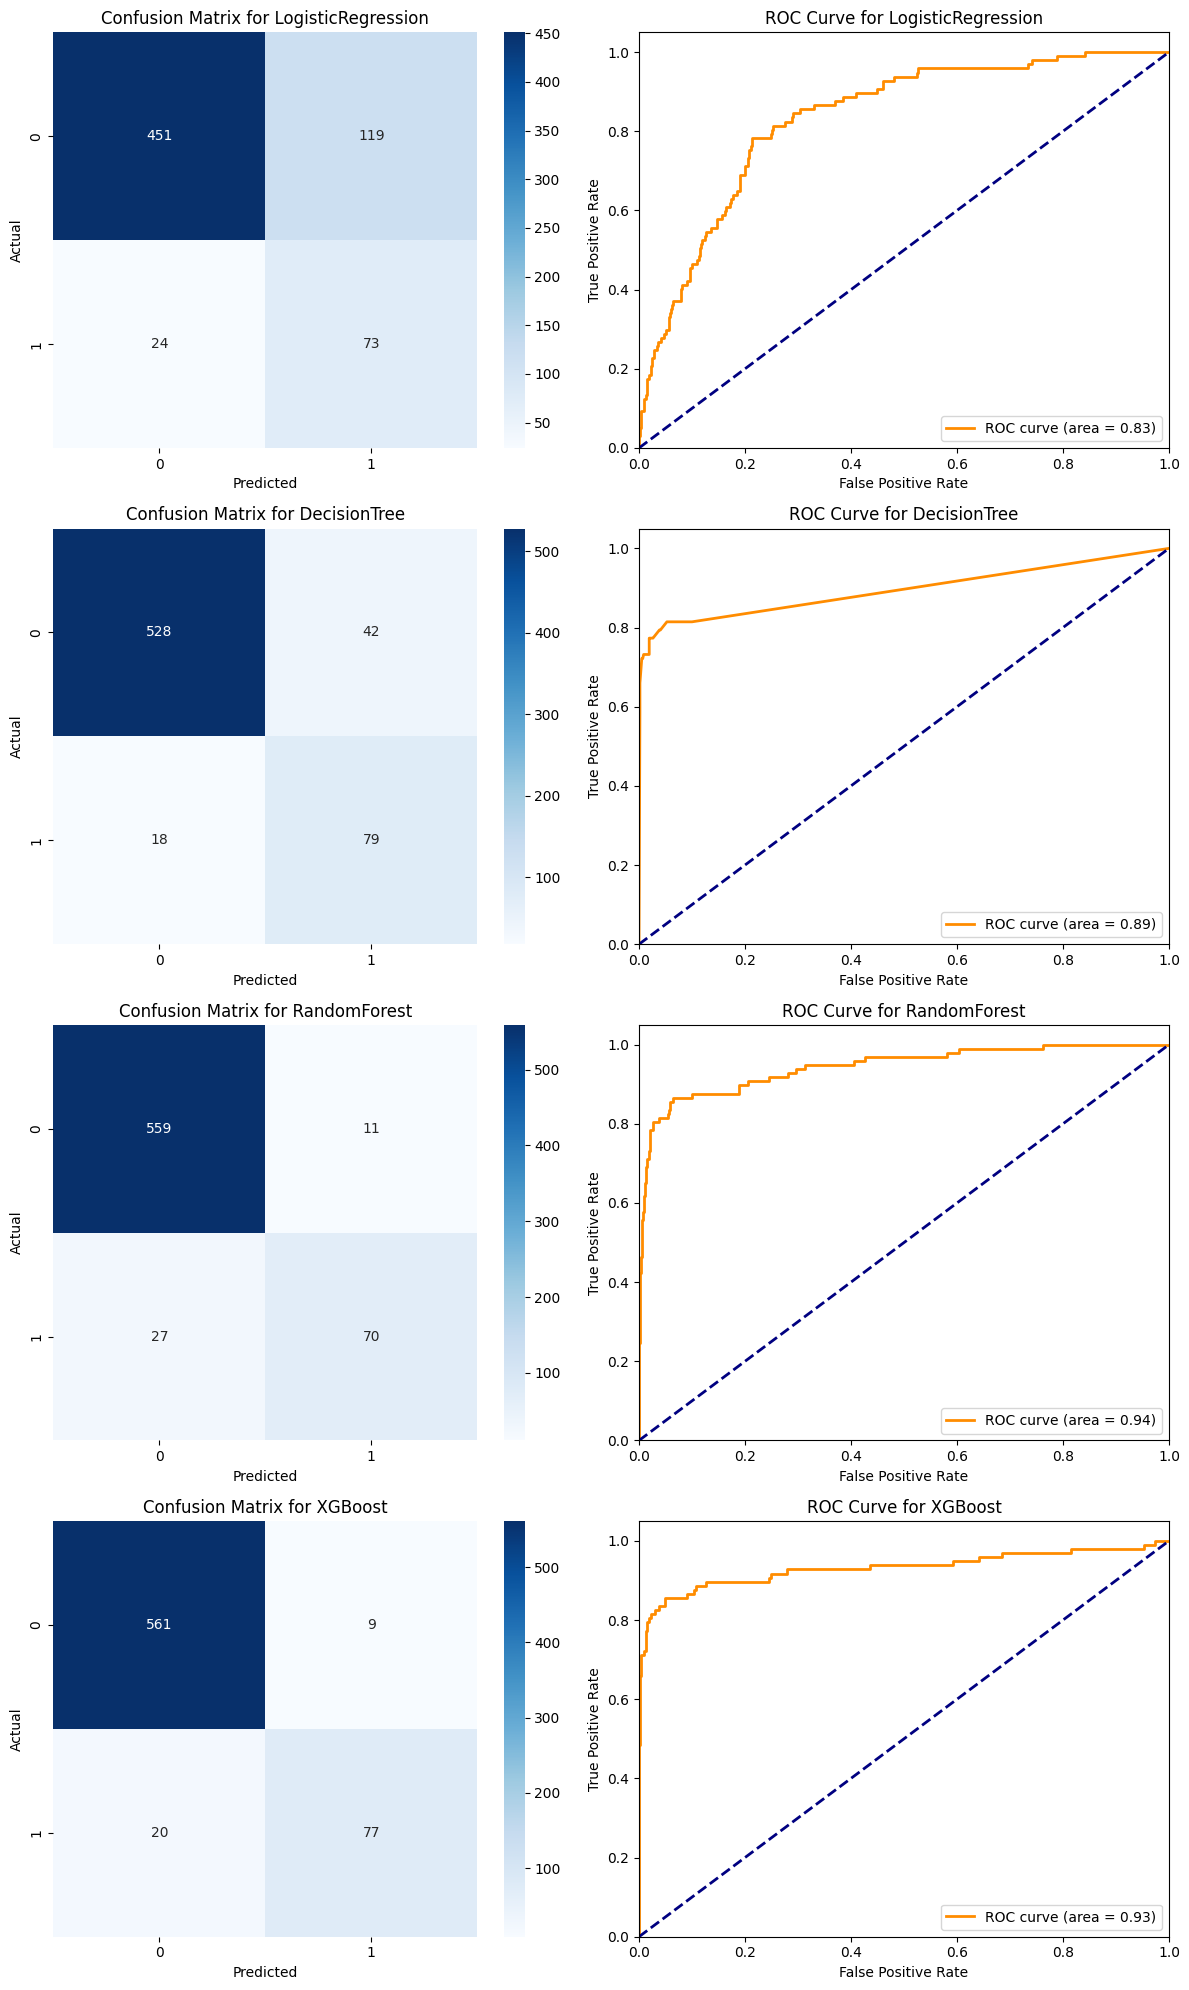

In [46]:
def plot_confusion_matrix(ax, cm, model_name):
    """
    Plot confusion matrix for a given model.
    """
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

def plot_roc_curve(ax, y_test, y_pred_proba, model_name):
    """
    Plot ROC curve for a given model.
    """
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')
    ax.legend(loc='lower right')
    
# Number of models
num_models = len(balanced_results_weighted_loss)

# Create subplots
fig, axes = plt.subplots(num_models, 2, figsize=(12, 5 * num_models))

# Plot confusion matrices and ROC curves for the models
for i, (model_name, result) in enumerate(balanced_results_weighted_loss.items()):
    cm = result['Confusion Matrix']
    y_pred_proba = result['y_pred_proba']
    
    # Plot confusion matrix
    plot_confusion_matrix(axes[i, 0], cm, model_name)
    
    # Plot ROC curve
    plot_roc_curve(axes[i, 1], y_test, y_pred_proba, model_name)

# Adjust layout
plt.tight_layout()
plt.show()    

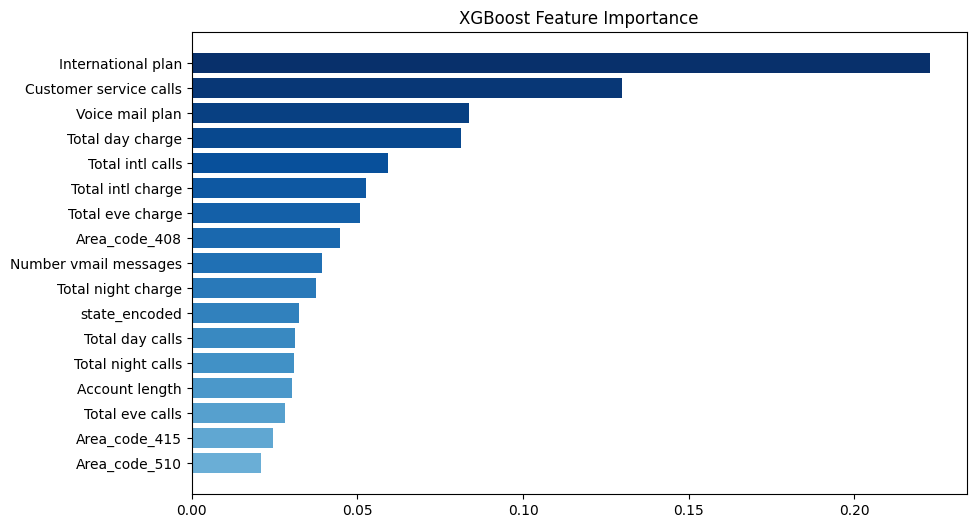

In [45]:
def plot_feature_importances(model, feature_names, model_name, top_n=17):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]  # Get indices of top N features
    top_features = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    # Create a colormap for the bars with shades of blue
    cmap = plt.cm.Blues 
    colors = cmap(np.linspace(0.5, 1, top_n)) 

    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(top_n), top_importances, align='center', color=colors)

    plt.yticks(range(top_n), top_features)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

best_xgboost_model = balanced_results_weighted_loss['XGBoost']['Best Model']
feature_names = x_train.columns

# Plot feature importances for XGBoost 
plot_feature_importances(best_xgboost_model, feature_names, 'XGBoost')
